In [79]:
# Import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Select random seed
np.random.seed(42)

In [80]:
class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') >= 0.97:
      print("\n Reached 97% accuracy so cancel training!")
      self.model.stop_training = True
      
callbacks = myCallbacks()

In [81]:
# Load in the fashion_mnist dataset
fashion_mnist_dataset = tf.keras.datasets.fashion_mnist
(X_train_origin, y_train), (X_test_origin, y_test) = fashion_mnist_dataset.load_data()

In [82]:
# Scale pixels of images from 0 to 1
X_train = X_train_origin / 255.0
X_test  = X_test_origin  / 255.0

In [83]:
# Get the shapes
print('Shape of input training data  :', X_train.shape)
print('Shape of output training data :', y_train.shape)
print('Shape of input testing data   :', X_test.shape)
print('Shape of output testing data  :', y_test.shape)

Shape of input training data  : (60000, 28, 28)
Shape of output training data : (60000,)
Shape of input testing data   : (10000, 28, 28)
Shape of output testing data  : (10000,)


In [84]:
# Label mapping
labels = { 0: 'T-shirt/top',
           1: 'Trouser', 
           2: 'Pullover',
           3: 'Dress',
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag',
           9: 'Ankle boot' }

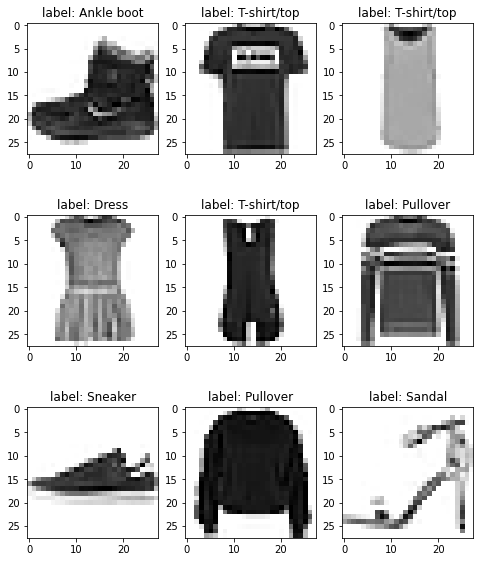

In [85]:
# Show some images of fashion_mnist dataset
plt.figure(figsize=(8, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.title('label: {}'.format(labels[y_train[i]]))
    plt.imshow(X_train_origin[i], cmap=plt.cm.binary)
plt.show()

In [86]:
# Modify shape of images
# Convolution expects shape to be (H x W x C)
X_train = np.expand_dims(X_train, -1)
X_test  = np.expand_dims(X_test,  -1)

# Check the shape
X_train.shape

(60000, 28, 28, 1)

In [87]:
# Shape of each single item of our data
img_dim = X_train[0].shape
print(img_dim)

(28, 28, 1)


In [88]:
# Get number of classes
K = len(set(y_train))
print('No. of classes =', K)

No. of classes = 10


In [89]:
# Import needed functions to build your model
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense
from tensorflow.keras.layers import Dropout, MaxPooling2D
from tensorflow.keras import Model

# Build your model using Functional API
I = Input(shape=img_dim)
X = Conv2D(32,  (3, 3), strides=(2, 2), activation='relu')(I)
X = Conv2D(128, (3, 3), strides=(2, 2), activation='relu')(X)
X = MaxPooling2D(2, 2)(X)
X = Flatten()(X)
X = Dropout(0.2)(X)
X = Dense(512, activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(K, activation='sigmoid')(X)

model = Model(I, X)

In [90]:
# Summary of the model
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 32)        320       
                                                                 
 conv2d_17 (Conv2D)          (None, 6, 6, 128)         36992     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 3, 3, 128)        0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1152)              0         
                                                                 
 dropout_9 (Dropout)         (None, 1152)              0         
                                                           

In [91]:
# Compile and fit the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(X_train, y_train,
                    validation_split = 0.15, 
                    epochs = 20,
                    callbacks = [callbacks])

Epoch 1/20
1594/1594 [==============================] - 34s 21ms/step - loss: 0.5016 - accuracy: 0.8172 - val_loss: 0.3943 - val_accuracy: 0.8499
Epoch 2/20
1594/1594 [==============================] - 33s 21ms/step - loss: 0.3491 - accuracy: 0.8678 - val_loss: 0.3029 - val_accuracy: 0.8851
Epoch 3/20
1594/1594 [==============================] - 33s 20ms/step - loss: 0.3006 - accuracy: 0.8864 - val_loss: 0.2799 - val_accuracy: 0.8964
Epoch 4/20
1594/1594 [==============================] - 32s 20ms/step - loss: 0.2719 - accuracy: 0.8970 - val_loss: 0.2699 - val_accuracy: 0.8990
Epoch 5/20
1594/1594 [==============================] - 32s 20ms/step - loss: 0.2467 - accuracy: 0.9071 - val_loss: 0.2696 - val_accuracy: 0.9031
Epoch 6/20
1594/1594 [==============================] - 32s 20ms/step - loss: 0.2276 - accuracy: 0.9145 - val_loss: 0.2553 - val_accuracy: 0.9050
Epoch 7/20
1594/1594 [==============================] - 32s 20ms/step - loss: 0.2046 - accuracy: 0.9203 - val_loss: 0.2755 -

In [92]:
# Evaluate your model
print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

1875/1875 [==============================] - 12s 6ms/step - loss: 0.0832 - accuracy: 0.9774
[0.08321715146303177, 0.9774166941642761]
313/313 [==============================] - 2s 6ms/step - loss: 0.3605 - accuracy: 0.9090
[0.36051738262176514, 0.9089999794960022]


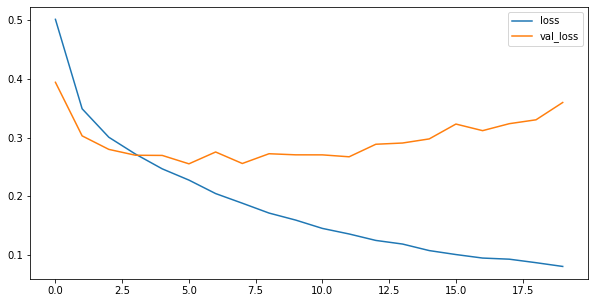

In [93]:
# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

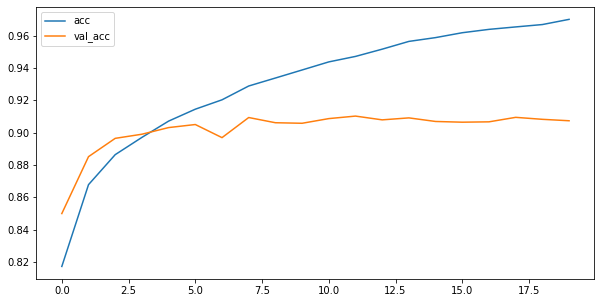

In [94]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [95]:
# Prediction
p_test = model.predict(X_test).argmax(axis=1)
p_test

array([9, 2, 1, ..., 8, 1, 5])

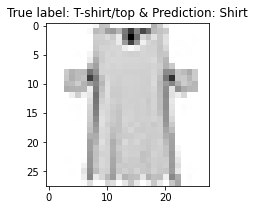

In [96]:
# Show some misclassified examples
plt.figure(figsize=(3,3))
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test_origin[i], cmap=plt.cm.binary)
plt.title('True label: {} & Prediction: {}'\
          .format(labels[y_test[i]], labels[p_test[i]]))
plt.show()

In [97]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm, '\n')
    
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


Confusion matrix, without normalization
[[862   2  17  10   2   1  98   0   8   0]
 [  0 978   1  14   1   0   5   0   1   0]
 [ 19   0 867   7  44   0  61   0   1   1]
 [ 14   1  11 927  19   0  27   0   1   0]
 [  0   1  72  33 813   0  80   0   1   0]
 [  0   0   0   0   0 981   0  13   0   6]
 [ 97   3  66  25  51   0 749   0   9   0]
 [  0   0   0   0   0  12   0 968   0  20]
 [  4   1   4   2   1   1   6   3 978   0]
 [  0   0   0   0   0   6   0  26   1 967]] 



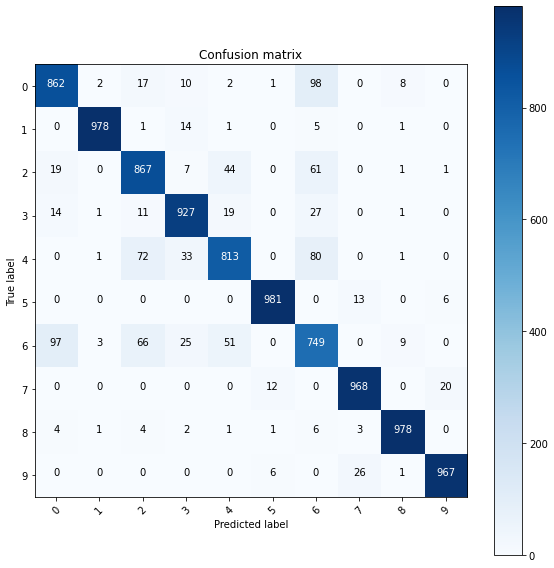

In [98]:
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))
